In [1]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/CNN_assignment.zip -d /content/CNN

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: /content/CNN/Skin cancer

#### Preparing the train and validation dataset

In [4]:
train_images=pathlib.Path("/content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_images=pathlib.Path("/content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(train_images.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_images.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
train_ds_images=keras.preprocessing.image_dataset_from_directory(train_images,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
validation_ds_images=keras.preprocessing.image_dataset_from_directory(train_images,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


#### Observations ---
1. Number of training images - 2239
2. Number of validation images - 447
3. Number of test images - 118

In [8]:
class_names = train_ds_images.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


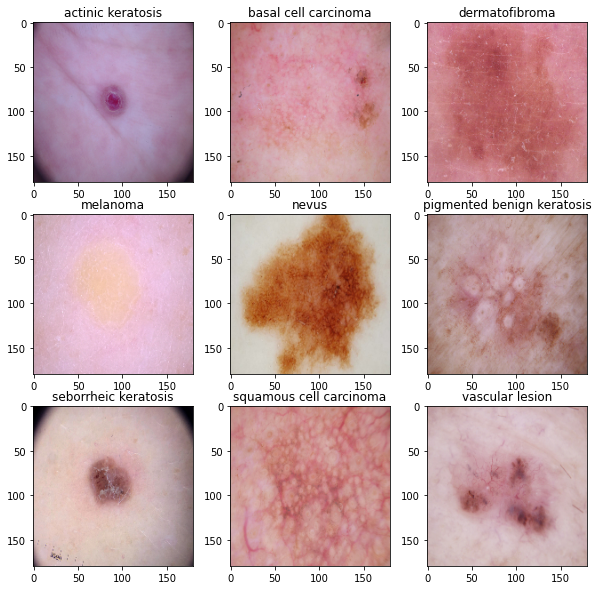

In [9]:
plt.figure(figsize=(10,10))
for image,label in train_ds_images.take(1):
  for i in range(9):    
    ax = plt.subplot(3, 3,1+i)               
    ax.set_title(class_names[i])
    plt.imshow(image[i].numpy().astype("uint8"))
plt.show()

#### Observations ---
1. Total of 9 different types of skin cancers.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_images = train_ds_images.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds_images = validation_ds_images.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Base Model 

In [12]:
basemodel=Sequential([layers.Rescaling(1./255, input_shape=(180, 180,3))])
basemodel.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180,180,32)))
basemodel.add(Activation('relu'))
basemodel.add(Conv2D(32, (3, 3)))
basemodel.add(Activation('relu'))

basemodel.add(Conv2D(64, (3, 3), padding='same'))
basemodel.add(Activation('relu'))
basemodel.add(Conv2D(64, (3, 3)))
basemodel.add(Activation('relu'))

basemodel.add(Flatten())
basemodel.add(Dense(256,activation='relu'))
basemodel.add(Dense(9))
basemodel.add(Activation('softmax'))

In [13]:
basemodel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 64)      18496     
                                                                 
 activation_2 (Activation)   (None, 178, 178, 64)      0

In [14]:
base_model=basemodel.fit(train_ds_images,              
              epochs=20,
              validation_data=validation_ds_images)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 42s 329ms/step - loss: 7.9157 - accuracy: 0.2461 - val_loss: 1.8153 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 16s 277ms/step - loss: 1.8215 - accuracy: 0.3549 - val_loss: 1.6489 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 15s 276ms/step - loss: 1.5307 - accuracy: 0.4754 - val_loss: 1.5938 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 15s 272ms/step - loss: 1.3501 - accuracy: 0.5335 - val_loss: 1.5808 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 15s 272ms/step - loss: 1.3363 - accuracy: 0.5156 - val_loss: 1.8010 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 15s 273ms/step - loss: 1.1852 - accuracy: 0.5826 - val_loss: 1.7796 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 15s 275ms/step - loss: 1.0721 - accuracy: 0.6222 - val_loss: 1.5716 - val_accuracy: 0.5190
Epoch 8/20

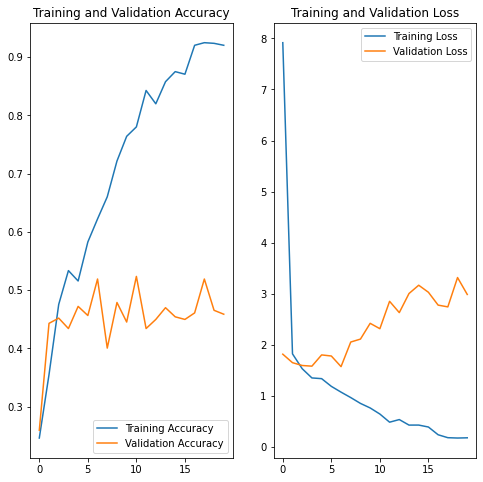

In [15]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']

loss = base_model.history['loss']
val_loss = base_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations From Base Model --
1. Accuracy of train set is very high 92% and validation set is 45%. 
2. The high difference in train and validation accuracy means the model has highly Over fitted.

### Model 2 -- Adding some image augmentation

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ]
)

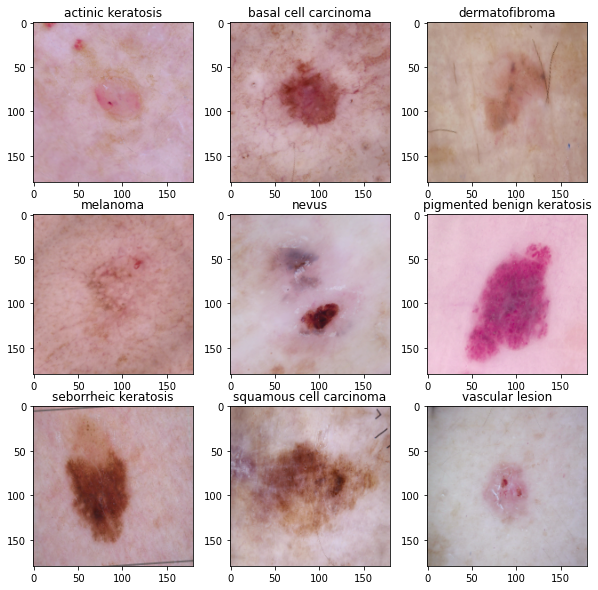

In [17]:
plt.figure(figsize=(10,10))
for image,label in train_ds_images.take(1):
  for i in range(9):    
    ax = plt.subplot(3, 3,1+i)               
    ax.set_title(class_names[i])
    plt.imshow(data_augmentation(image)[i].numpy().astype("uint8"))
plt.show()

In [18]:
model=Sequential([data_augmentation,layers.Rescaling(1./255, input_shape=(180, 180,3))])
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180,180,32)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

In [19]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
augmented_model=model.fit(train_ds_images,              
              epochs=20,
              validation_data=validation_ds_images)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 8s 103ms/step - loss: 2.9161 - accuracy: 0.1959 - val_loss: 2.0345 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 5s 97ms/step - loss: 2.0389 - accuracy: 0.2003 - val_loss: 1.9888 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 5s 96ms/step - loss: 2.0516 - accuracy: 0.2210 - val_loss: 2.0262 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.8462 - accuracy: 0.3131 - val_loss: 1.6746 - val_accuracy: 0.3870
Epoch 5/20
56/56 [==============================] - 5s 96ms/step - loss: 1.7810 - accuracy: 0.3532 - val_loss: 1.7462 - val_accuracy: 0.3826
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.6766 - accuracy: 0.3945 - val_loss: 1.6062 - val_accuracy: 0.4251
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.6700 - accuracy: 0.4035 - val_loss: 1.6754 - val_accuracy: 0.3870
Epoch 8/20
56/56 [=====

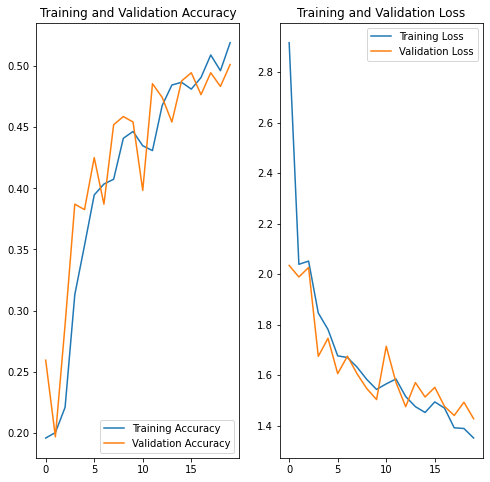

In [21]:
acc = augmented_model.history['accuracy']
val_acc = augmented_model.history['val_accuracy']

loss = augmented_model.history['loss']
val_loss = augmented_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations from Model 2 ---
1. There is no much difference between the train and validation accuracy indicating that augmentaion has solved the over fitting problem.
2. The train accuracy is just above 50% which the model has learnt all the features as a result it is performing very poorly.

## Distribution of classes in the training dataset

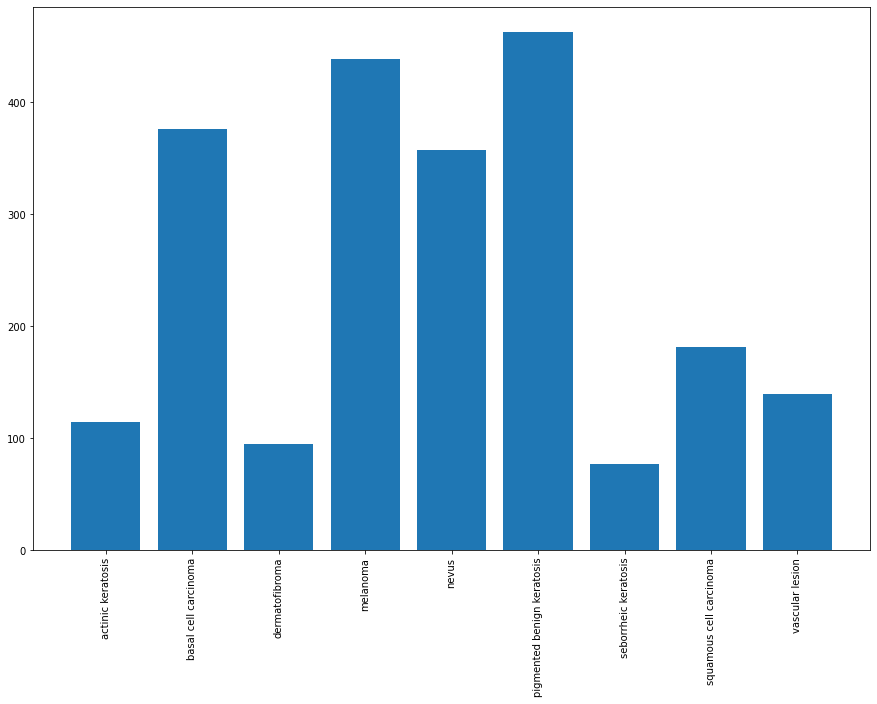

In [22]:
count=[]
for i in class_names:
    count.append(len(list(train_images.glob(i+'/*.jpg'))))
plt.figure(figsize=(15,10))
plt.bar(class_names,count)
plt.xticks(rotation=90)
plt.show()

### Which class has the least number of samples?
    --- seborrheic keratosis is least followed by dermatofibroma

### Which classes dominate the data in terms proportionate number of samples?
    --- pigmented benign keratosis is highest followed by melanoma

In [23]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
path_to_training_dataset="/content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F08C0D75490>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F09E94034D0>: 100%|██████████| 500/500 [00:17<00:00, 28.64 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F08C0D3E0D0>: 100%|██████████| 500/500 [00:17<00:00, 28.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F09526CF510>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F0954383790>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F09525B81D0>: 100%|██████████| 500/500 [00:17<00:00, 29.23 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F09525C75D0>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F09525C7450>: 100%|██████████| 500/500 [00:16<00:00, 30.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F09525E3850>: 100%|██████████| 500/500 [00:16<00:00, 30.83 Samples/s]


In [25]:
image_count_train = len(list(train_images.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Original dataset for each label with number of samples

In [26]:
path_list = [x for x in glob(os.path.join(train_images,'*/', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_images,'*/', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
originaldf = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
originaldf['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Dataset after augmentation

In [27]:
path_list_new = [x for x in glob(os.path.join(train_images, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_images, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = originaldf.append(df2)
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [28]:
data_dir_train1=pathlib.Path("/content/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


### Creating Train and Validation datasets with new dataset

In [29]:
train_images=keras.preprocessing.image_dataset_from_directory(data_dir_train1,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="training")

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [30]:
validation_images=keras.preprocessing.image_dataset_from_directory(data_dir_train1,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="validation")

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [31]:
Augmodel=Sequential([layers.Rescaling(1./255, input_shape=(180, 180,3))])
Augmodel.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180,180,32)))
Augmodel.add(Activation('relu'))
Augmodel.add(Conv2D(32, (3, 3)))
Augmodel.add(Activation('relu'))
Augmodel.add(MaxPooling2D(pool_size=(2, 2)))
Augmodel.add(Dropout(0.25))

Augmodel.add(Conv2D(64, (3, 3), padding='same'))
Augmodel.add(Activation('relu'))
Augmodel.add(Conv2D(64, (3, 3)))
Augmodel.add(Activation('relu'))
Augmodel.add(MaxPooling2D(pool_size=(2, 2)))
Augmodel.add(Dropout(0.25))

Augmodel.add(Flatten())
Augmodel.add(Dense(512))
Augmodel.add(Activation('relu'))
Augmodel.add(Dropout(0.5))
Augmodel.add(Dense(9))
Augmodel.add(Activation('softmax'))

In [32]:
Augmodel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
Final_model=Augmodel.fit(train_images,              
              epochs=30,
              validation_data=validation_images)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 29s 162ms/step - loss: 2.3221 - accuracy: 0.1421 - val_loss: 2.1878 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 29s 166ms/step - loss: 2.1796 - accuracy: 0.1434 - val_loss: 2.1867 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 27s 157ms/step - loss: 2.1768 - accuracy: 0.1397 - val_loss: 2.1874 - val_accuracy: 0.1411
Epoch 4/30
169/169 [==============================] - 27s 157ms/step - loss: 2.1739 - accuracy: 0.1458 - val_loss: 2.1677 - val_accuracy: 0.1581
Epoch 5/30
169/169 [==============================] - 28s 160ms/step - loss: 2.1384 - accuracy: 0.1643 - val_loss: 2.0532 - val_accuracy: 0.2056
Epoch 6/30
169/169 [==============================] - 27s 157ms/step - loss: 2.0438 - accuracy: 0.2227 - val_loss: 1.9370 - val_accuracy: 0.2539
Epoch 7/30
169/169 [==============================] - 27s 158ms/step - loss: 1.8024 - accuracy: 0.3053 - val_loss: 1.5713 - val_accuracy: 0.3

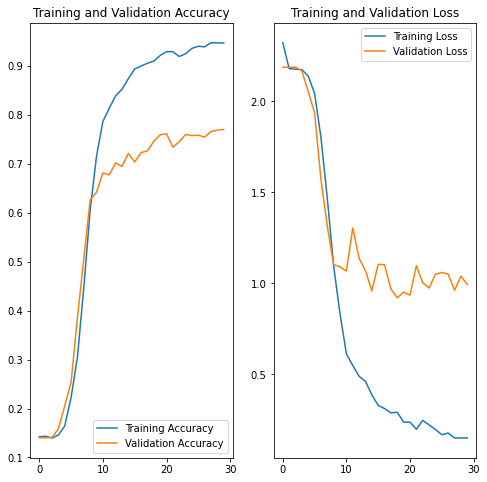

In [34]:
acc = Final_model.history['accuracy']
val_acc = Final_model.history['val_accuracy']

loss = Final_model.history['loss']
val_loss = Final_model.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations ---
1. Train and Validation Accuracy Increased.
2. Increased the number of epochs to 30 as the data has increased.
3. Less differences between train and validation accuracies indicate that model hasnt overfitted
4. Used dropouts and maxpooling.